In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [4]:
HTS_TST_KSM_Migori = pd.read_csv("/home/ashioyajotham/HIV Testing/HTS_TST-KSM - Migori County.csv")
HTS_TST_KSM_Bungoma = pd.read_csv("/home/ashioyajotham/HIV Testing/HTS_TST-KSM - Bungoma County.csv")
HTS_TST_KSM_Kakamega = pd.read_csv("/home/ashioyajotham/HIV Testing/HTS_TST-KSM - Kakamega County.csv")
HTS_comparison21 = pd.read_csv("/home/ashioyajotham/HIV Testing/HTS_comparison21.csv")
PMTCT_KSM_Migori = pd.read_csv("/home/ashioyajotham/HIV Testing/PMTCT-KSM - Migori County.csv")
#PMTCT_KSM_Bungoma = pd.read_csv("/home/ashioyajotham/HIV Testing/PMTCT-KSM - Bungoma County.csv")
PMTCT_KSM_Kakamega = pd.read_csv("/home/ashioyajotham/HIV Testing/PMTCT-KSM - Kakamega County.csv")
PMTCT_comparison21 = pd.read_csv("/home/ashioyajotham/HIV Testing/PMTCT_comparison21.csv")

In [4]:
HTS_TST_KSM_Migori.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,Indicator Name,period,dhis2_value,datim_value
0,aCOEeeYEcsO,Rabondo Dispensary,14019,West sakwa Ward,Awendo Sub County,Migori County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2019Q4,33,87.0
1,aCOEeeYEcsO,Rabondo Dispensary,14019,West sakwa Ward,Awendo Sub County,Migori County,OePJt8CcZ0d,MOH 731 Tested_1-9 HV01-01,2020Q1,14,13.0
2,aWpElDmioIw,Kuja Dispensary,13724,North sakwa Ward,Awendo Sub County,Migori County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2019Q4,15,53.0
3,aWpElDmioIw,Kuja Dispensary,13724,North sakwa Ward,Awendo Sub County,Migori County,pkShOkgNQt2,MOH 731 Tested_20-24(M) HV01-06,2020Q2,9,10.0
4,aWpElDmioIw,Kuja Dispensary,13724,North sakwa Ward,Awendo Sub County,Migori County,YXJf27jfkvS,MOH 731 Tested_15-19(F) HV01-05,2019Q4,7,39.0


In [5]:
HTS_TST_KSM_Bungoma.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,Indicator Name,period,dhis2_value,datim_value
0,AqeQqDLlXDT,Kaptama (Friends) Health Centre,15925,Kaptama Ward,Mt Elgon Sub County,Bungoma County,gTkVw97FnQK,MOH 731 Tested_25+ (M) HV01-08,2020Q1,29,NaN
1,AqeQqDLlXDT,Kaptama (Friends) Health Centre,15925,Kaptama Ward,Mt Elgon Sub County,Bungoma County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2019Q4,12,NaN
2,AqeQqDLlXDT,Kaptama (Friends) Health Centre,15925,Kaptama Ward,Mt Elgon Sub County,Bungoma County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2020Q2,5,NaN
3,AqeQqDLlXDT,Kaptama (Friends) Health Centre,15925,Kaptama Ward,Mt Elgon Sub County,Bungoma County,YXJf27jfkvS,MOH 731 Tested_15-19(F) HV01-05,2020Q2,2,NaN
4,awNVSk5ZtGX,Khalumuli Dispensary,15932,sitikho Ward,Webuye West Sub County,Bungoma County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2019Q4,13,28.0


In [6]:
HTS_TST_KSM_Kakamega.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,Indicator Name,period,dhis2_value,datim_value
0,AbSJUr5oge2,Likuyani Sub-District Hospital,15961,Likuyani Ward,Likuyani Sub County,Kakamega County,gTkVw97FnQK,MOH 731 Tested_25+ (M) HV01-08,2020Q2,93,96.0
1,AbSJUr5oge2,Likuyani Sub-District Hospital,15961,Likuyani Ward,Likuyani Sub County,Kakamega County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2020Q1,43,110.0
2,AbSJUr5oge2,Likuyani Sub-District Hospital,15961,Likuyani Ward,Likuyani Sub County,Kakamega County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2020Q2,24,92.0
3,AbSJUr5oge2,Likuyani Sub-District Hospital,15961,Likuyani Ward,Likuyani Sub County,Kakamega County,lj9QYJqS7bN,MOH 731 Tested_10-14 (M) HV01-02,2019Q4,1,1.0
4,AbSJUr5oge2,Likuyani Sub-District Hospital,15961,Likuyani Ward,Likuyani Sub County,Kakamega County,OePJt8CcZ0d,MOH 731 Tested_1-9 HV01-01,2020Q1,7,8.0


In [5]:
HTS_TST_KSM = pd.concat([HTS_TST_KSM_Migori, HTS_TST_KSM_Bungoma, HTS_TST_KSM_Kakamega])
HTS_TST_KSM.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,Indicator Name,period,dhis2_value,datim_value
0,aCOEeeYEcsO,Rabondo Dispensary,14019,West sakwa Ward,Awendo Sub County,Migori County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2019Q4,33,87.0
1,aCOEeeYEcsO,Rabondo Dispensary,14019,West sakwa Ward,Awendo Sub County,Migori County,OePJt8CcZ0d,MOH 731 Tested_1-9 HV01-01,2020Q1,14,13.0
2,aWpElDmioIw,Kuja Dispensary,13724,North sakwa Ward,Awendo Sub County,Migori County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2019Q4,15,53.0
3,aWpElDmioIw,Kuja Dispensary,13724,North sakwa Ward,Awendo Sub County,Migori County,pkShOkgNQt2,MOH 731 Tested_20-24(M) HV01-06,2020Q2,9,10.0
4,aWpElDmioIw,Kuja Dispensary,13724,North sakwa Ward,Awendo Sub County,Migori County,YXJf27jfkvS,MOH 731 Tested_15-19(F) HV01-05,2019Q4,7,39.0


In [6]:
HTS_TST_KSM.shape

(9322, 11)

In [9]:
HTS_TST_KSM.county.value_counts()

Kakamega County    3688
Migori County      3304
Bungoma County     2330
Name: county, dtype: int64

In [7]:
HTS_comparison21.head()

,facility,ward,subcounty,county,MOH_FacilityID,MOH_IndicatorCode,indicators,khis_data,datim_data,Unnamed: 9
0,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,a0qvQ3FrCD8,SCMKsiNj6c5,MOH 731 Start ART_25+(M) HV03-024,7,7.0,0
1,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,a0qvQ3FrCD8,YXJf27jfkvS,MOH 731 Tested_15-19(F) HV01-05,12,43.0,-31
2,Westlands Health Centre,Parklands/Highridge Ward,Westlands Sub County,Nairobi County,a0XwYzX3wfw,SCMKsiNj6c5,MOH 731 Start ART_25+(M) HV03-024,7,6.0,1
3,Westlands Health Centre,Parklands/Highridge Ward,Westlands Sub County,Nairobi County,a0XwYzX3wfw,YXJf27jfkvS,MOH 731 Tested_15-19(F) HV01-05,16,48.0,-32
4,Murang'a District Hospital,Township Ward,Kiharu Sub County,Muranga County,A19e0CHhTj3,gMICOUtzqRb,MOH 731 Tested_10-14(F) HV01-03,19,45.0,-26


In [11]:
HTS_comparison21.county.value_counts().sum()

35525

In [8]:
PMTCT_KSM = pd.concat([PMTCT_KSM_Migori, PMTCT_KSM_Kakamega])
PMTCT_KSM.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,indicator_name,period,dhis2_value,datim_value
0,SZnkrFoimi2,Kugitimo Health Centre,13723.0,Nyabasi east Ward,Kuria East Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,64.0,64.0
1,xt2lltkTLza,Ntimaru Sub-District Hospital,13858.0,Ntimaru west Ward,Kuria East Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2019Q4,119.0,124.0
2,NoZjHcIDHGW,Kegonga District Hospital,13663.0,Nyabasi east Ward,Kuria East Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q2,1.0,1.0
3,SZnkrFoimi2,Kugitimo Health Centre,13723.0,Nyabasi east Ward,Kuria East Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q2,46.0,45.0
4,xt2lltkTLza,Ntimaru Sub-District Hospital,13858.0,Ntimaru west Ward,Kuria East Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,194.0,191.0


In [13]:
PMTCT_KSM.county.value_counts()

Kakamega County    776
Migori County      669
Name: county, dtype: int64

In [14]:
PMTCT_KSM.columns

Index(['facilityuid', 'facility', 'code', 'ward', 'sub_county', 'county',
       'indicator', 'indicator_name', 'period', 'dhis2_value', 'datim_value'],
      dtype='object')

In [15]:
PMTCT_KSM.shape

(1651, 11)

In [9]:
PMTCT_comparison21.head()

,facility,ward,subcounty,county,MOH_FacilityID,MOH_IndicatorCode,indicators,khis_data,datim_data
0,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,a0qvQ3FrCD8,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,207,269.0
1,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,a0qvQ3FrCD8,lJpaBye9B0H,MOH 731 On HAART at 1st ANC HV02-16,10,20.0
2,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,a0qvQ3FrCD8,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,10,10.0
3,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,a0qvQ3FrCD8,WNFWVHMqPv9,MOH 731 Start HAART_ANC HV02-17,2,2.0
4,Westlands Health Centre,Parklands/Highridge Ward,Westlands Sub County,Nairobi County,a0XwYzX3wfw,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,525,535.0


In [17]:
PMTCT_comparison21.county.value_counts().sum()

7274

# Data Cleaning

In [10]:
# Rename columns
HTS_comparison21.rename(columns={'subcounty':'sub_county'}, inplace=True)
HTS_comparison21.rename(columns={"datim_data":"datim_value"}, inplace=True)
PMTCT_KSM.rename(columns={'subcounty':'sub_county'}, inplace=True)
PMTCT_comparison21.rename(columns={'subcounty':'sub_county'}, inplace=True)
HTS_TST_KSM.rename(columns={'Indicator Name':'indicators'}, inplace=True)
PMTCT_KSM.rename(columns={'indicator_name':'indicators'}, inplace=True)
PMTCT_comparison21.rename(columns={"datim_data":"datim_value"}, inplace=True)


In [11]:
# Drop columns
HTS_comparison21.drop(['Unnamed: 9'], axis=1, inplace=True)

In [20]:
HTS_TST_KSM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9322 entries, 0 to 3687
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   facilityuid  9322 non-null   object 
 1   facility     9322 non-null   object 
 2   code         9322 non-null   int64  
 3   ward         9322 non-null   object 
 4   sub_county   9322 non-null   object 
 5   county       9322 non-null   object 
 6   indicator    9322 non-null   object 
 7   indicators   9322 non-null   object 
 8   period       9322 non-null   object 
 9   dhis2_value  9322 non-null   int64  
 10  datim_value  9162 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 873.9+ KB


In [21]:
HTS_comparison21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35525 entries, 0 to 35524
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   facility           35525 non-null  object 
 1   ward               35525 non-null  object 
 2   sub_county         35525 non-null  object 
 3   county             35525 non-null  object 
 4   MOH_FacilityID     35525 non-null  object 
 5   MOH_IndicatorCode  35525 non-null  object 
 6   indicators         35525 non-null  object 
 7   khis_data          35525 non-null  int64  
 8   datim_value        34569 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 2.4+ MB


In [22]:
PMTCT_KSM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 0 to 775
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   facilityuid  1445 non-null   object 
 1   facility     1445 non-null   object 
 2   code         1445 non-null   float64
 3   ward         1445 non-null   object 
 4   sub_county   1445 non-null   object 
 5   county       1445 non-null   object 
 6   indicator    1445 non-null   object 
 7   indicators   1445 non-null   object 
 8   period       1445 non-null   object 
 9   dhis2_value  1445 non-null   float64
 10  datim_value  1432 non-null   float64
dtypes: float64(3), object(8)
memory usage: 154.8+ KB


In [23]:
PMTCT_comparison21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   facility           7274 non-null   object 
 1   ward               7274 non-null   object 
 2   sub_county         7274 non-null   object 
 3   county             7274 non-null   object 
 4   MOH_FacilityID     7274 non-null   object 
 5   MOH_IndicatorCode  7274 non-null   object 
 6   indicators         7274 non-null   object 
 7   khis_data          7274 non-null   int64  
 8   datim_value        7085 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 511.6+ KB


In [12]:
# Merge the dfs
HTS_PMTCT_KSM = pd.concat([HTS_TST_KSM, PMTCT_KSM])

In [13]:
HTS_PMTCT_KSM.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,indicators,period,dhis2_value,datim_value
0,aCOEeeYEcsO,Rabondo Dispensary,14019.0,West sakwa Ward,Awendo Sub County,Migori County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2019Q4,33.0,87.0
1,aCOEeeYEcsO,Rabondo Dispensary,14019.0,West sakwa Ward,Awendo Sub County,Migori County,OePJt8CcZ0d,MOH 731 Tested_1-9 HV01-01,2020Q1,14.0,13.0
2,aWpElDmioIw,Kuja Dispensary,13724.0,North sakwa Ward,Awendo Sub County,Migori County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2019Q4,15.0,53.0
3,aWpElDmioIw,Kuja Dispensary,13724.0,North sakwa Ward,Awendo Sub County,Migori County,pkShOkgNQt2,MOH 731 Tested_20-24(M) HV01-06,2020Q2,9.0,10.0
4,aWpElDmioIw,Kuja Dispensary,13724.0,North sakwa Ward,Awendo Sub County,Migori County,YXJf27jfkvS,MOH 731 Tested_15-19(F) HV01-05,2019Q4,7.0,39.0


In [14]:
HTS_PMTCT_comparison21 = pd.concat([HTS_comparison21,PMTCT_comparison21])
HTS_PMTCT_comparison21.head()

,facility,ward,sub_county,county,MOH_FacilityID,MOH_IndicatorCode,indicators,khis_data,datim_value
0,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,a0qvQ3FrCD8,SCMKsiNj6c5,MOH 731 Start ART_25+(M) HV03-024,7,7.0
1,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,a0qvQ3FrCD8,YXJf27jfkvS,MOH 731 Tested_15-19(F) HV01-05,12,43.0
2,Westlands Health Centre,Parklands/Highridge Ward,Westlands Sub County,Nairobi County,a0XwYzX3wfw,SCMKsiNj6c5,MOH 731 Start ART_25+(M) HV03-024,7,6.0
3,Westlands Health Centre,Parklands/Highridge Ward,Westlands Sub County,Nairobi County,a0XwYzX3wfw,YXJf27jfkvS,MOH 731 Tested_15-19(F) HV01-05,16,48.0
4,Murang'a District Hospital,Township Ward,Kiharu Sub County,Muranga County,A19e0CHhTj3,gMICOUtzqRb,MOH 731 Tested_10-14(F) HV01-03,19,45.0


In [27]:
HTS_PMTCT_KSM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10973 entries, 0 to 775
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   facilityuid  10767 non-null  object 
 1   facility     10767 non-null  object 
 2   code         10767 non-null  float64
 3   ward         10767 non-null  object 
 4   sub_county   10767 non-null  object 
 5   county       10767 non-null  object 
 6   indicator    10767 non-null  object 
 7   indicators   10767 non-null  object 
 8   period       10767 non-null  object 
 9   dhis2_value  10767 non-null  float64
 10  datim_value  10594 non-null  float64
dtypes: float64(3), object(8)
memory usage: 1.0+ MB


In [28]:
HTS_PMTCT_comparison21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42799 entries, 0 to 7273
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   facility           42799 non-null  object 
 1   ward               42799 non-null  object 
 2   sub_county         42799 non-null  object 
 3   county             42799 non-null  object 
 4   MOH_FacilityID     42799 non-null  object 
 5   MOH_IndicatorCode  42799 non-null  object 
 6   indicators         42799 non-null  object 
 7   khis_data          42799 non-null  int64  
 8   datim_value        41654 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 3.3+ MB


## Insights -
* `datim_value` - Data for Accountability, Transparency and Impact Monitoring (DATIM). DATIM is the PEPFAR-specific version of Kenya Health Information System (KHIS) in Kenya
* KHIS is customized from DHIS2, an open-source software platform for reporting, analysis and dissemination of data for all health programs, developed by the Health Information Systems Program, University of Oslo and is used to collect data at all levels required for; site level reporting at the facility and community level as well as aggregations at the subnational and national levels in Kenya.
* HTS-TST (Number of individuals who received HIV Testing Services (HTS) and received their test results) for instance, `HIV01-01` - number of individuals who received testing counselling services for HIV and received their test results
* `ART` - Antiretroviral Therapy
* PMTCT - Prevention of Mother To Child Transmission
* `KSM` here means Kenya Standard Mean. It is the average number of people who test for HIV in a year. It is calculated by dividing the total number of people who test for HIV in a year by the number of years. The KSM is used to compare the number of people who test for HIV in a year with the number of people who test for HIV in other years.




## Data Cleaning

In [29]:
HTS_PMTCT_KSM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10973 entries, 0 to 775
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   facilityuid  10767 non-null  object 
 1   facility     10767 non-null  object 
 2   code         10767 non-null  float64
 3   ward         10767 non-null  object 
 4   sub_county   10767 non-null  object 
 5   county       10767 non-null  object 
 6   indicator    10767 non-null  object 
 7   indicators   10767 non-null  object 
 8   period       10767 non-null  object 
 9   dhis2_value  10767 non-null  float64
 10  datim_value  10594 non-null  float64
dtypes: float64(3), object(8)
memory usage: 1.0+ MB


In [15]:
HTS_PMTCT_KSM.dropna(inplace=True)

In [16]:
HTS_PMTCT_comparison21["datim_value"].fillna(HTS_PMTCT_comparison21["datim_value"].mean(), inplace=True)

In [32]:
HTS_PMTCT_comparison21.isna().sum(),  HTS_PMTCT_KSM.isna().sum()

(facility             0
 ward                 0
 sub_county           0
 county               0
 MOH_FacilityID       0
 MOH_IndicatorCode    0
 indicators           0
 khis_data            0
 datim_value          0
 dtype: int64, facilityuid    0
 facility       0
 code           0
 ward           0
 sub_county     0
 county         0
 indicator      0
 indicators     0
 period         0
 dhis2_value    0
 datim_value    0
 dtype: int64)

In [33]:
HTS_PMTCT_comparison21.columns

Index(['facility', 'ward', 'sub_county', 'county', 'MOH_FacilityID',
       'MOH_IndicatorCode', 'indicators', 'khis_data', 'datim_value'],
      dtype='object')

In [34]:
HTS_PMTCT_KSM.columns

Index(['facilityuid', 'facility', 'code', 'ward', 'sub_county', 'county',
       'indicator', 'indicators', 'period', 'dhis2_value', 'datim_value'],
      dtype='object')

In [17]:
HTS_PMTCT = pd.merge(HTS_PMTCT_KSM, HTS_PMTCT_comparison21, on=['facility', 'ward', 'sub_county', 'county','indicators', 'datim_value'], how="inner")
HTS_PMTCT.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,indicators,period,dhis2_value,datim_value,MOH_FacilityID,MOH_IndicatorCode,khis_data
0,FIDsgV3ezn0,Olasi Dispensary,13975.0,Kaler Ward,Nyatike Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,37.0,36.0,FIDsgV3ezn0,ETX9cUWF43c,32
1,KpXqE32Rm1d,Kombe Dispensary,13713.0,Masaba Ward,Kuria West Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,28.0,27.0,KpXqE32Rm1d,ETX9cUWF43c,27
2,V6P9Brv9LmO,Otati Dispensary,13999.0,Kanyasa Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q2,8.0,8.0,V6P9Brv9LmO,qSgLzXh46n9,8
3,QiXeOXMmlX0,Arombe Dispensary,13486.0,Wiga Ward,Suna West Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q1,18.0,18.0,QiXeOXMmlX0,qSgLzXh46n9,18
4,hLMDMOsAv6Y,Bande Dispensary,13494.0,Kaler Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q1,4.0,4.0,hLMDMOsAv6Y,qSgLzXh46n9,4


In [36]:
HTS_PMTCT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   facilityuid        69 non-null     object 
 1   facility           69 non-null     object 
 2   code               69 non-null     float64
 3   ward               69 non-null     object 
 4   sub_county         69 non-null     object 
 5   county             69 non-null     object 
 6   indicator          69 non-null     object 
 7   indicators         69 non-null     object 
 8   period             69 non-null     object 
 9   dhis2_value        69 non-null     float64
 10  datim_value        69 non-null     float64
 11  MOH_FacilityID     69 non-null     object 
 12  MOH_IndicatorCode  69 non-null     object 
 13  khis_data          69 non-null     int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 8.1+ KB


# Feature Engineering

In [18]:
# We need to obtain date from the period column since it is in the format 2020Q1
# We will use the split function to split the period column into two columns
# The first column will be the year and the second column will be the quarter
# We will then use the concat function to concatenate the two columns into one column
# We will then use the to_datetime function to convert the column into a datetime object

HTS_PMTCT[['Year','Quarter']] = HTS_PMTCT['period'].str.split('Q',expand=True)
#HTS_PMTCT.drop('period',axis=1,inplace=True)
HTS_PMTCT.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,indicators,period,dhis2_value,datim_value,MOH_FacilityID,MOH_IndicatorCode,khis_data,Year,Quarter
0,FIDsgV3ezn0,Olasi Dispensary,13975.0,Kaler Ward,Nyatike Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,37.0,36.0,FIDsgV3ezn0,ETX9cUWF43c,32,2020,1
1,KpXqE32Rm1d,Kombe Dispensary,13713.0,Masaba Ward,Kuria West Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,28.0,27.0,KpXqE32Rm1d,ETX9cUWF43c,27,2020,1
2,V6P9Brv9LmO,Otati Dispensary,13999.0,Kanyasa Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q2,8.0,8.0,V6P9Brv9LmO,qSgLzXh46n9,8,2020,2
3,QiXeOXMmlX0,Arombe Dispensary,13486.0,Wiga Ward,Suna West Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q1,18.0,18.0,QiXeOXMmlX0,qSgLzXh46n9,18,2020,1
4,hLMDMOsAv6Y,Bande Dispensary,13494.0,Kaler Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q1,4.0,4.0,hLMDMOsAv6Y,qSgLzXh46n9,4,2020,1


In [19]:
# We need to obtain the month from the quarter column
# We will use the replace function to replace the quarter with the corresponding month
# We will then use the concat function to concatenate the two columns into one column

HTS_PMTCT['Month'] = HTS_PMTCT['Quarter'].replace({'1':'01','2':'04','3':'07','4':'10'})
HTS_PMTCT.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,indicators,period,dhis2_value,datim_value,MOH_FacilityID,MOH_IndicatorCode,khis_data,Year,Quarter,Month
0,FIDsgV3ezn0,Olasi Dispensary,13975.0,Kaler Ward,Nyatike Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,37.0,36.0,FIDsgV3ezn0,ETX9cUWF43c,32,2020,1,01
1,KpXqE32Rm1d,Kombe Dispensary,13713.0,Masaba Ward,Kuria West Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,28.0,27.0,KpXqE32Rm1d,ETX9cUWF43c,27,2020,1,01
2,V6P9Brv9LmO,Otati Dispensary,13999.0,Kanyasa Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q2,8.0,8.0,V6P9Brv9LmO,qSgLzXh46n9,8,2020,2,04
3,QiXeOXMmlX0,Arombe Dispensary,13486.0,Wiga Ward,Suna West Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q1,18.0,18.0,QiXeOXMmlX0,qSgLzXh46n9,18,2020,1,01
4,hLMDMOsAv6Y,Bande Dispensary,13494.0,Kaler Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q1,4.0,4.0,hLMDMOsAv6Y,qSgLzXh46n9,4,2020,1,01


# Exploratory Data Analysis

In [39]:
HTS_PMTCT.code = HTS_PMTCT.code.astype("object")

In [40]:
HTS_PMTCT.select_dtypes(include=['int64','float64']).describe()

,dhis2_value,datim_value,khis_data
count,69.000000,69.000000,69.000000
mean,13.666667,13.681159,12.014493
std,29.404215,29.153999,24.038873
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000
75%,8.000000,8.000000,8.000000
max,174.000000,174.000000,126.000000


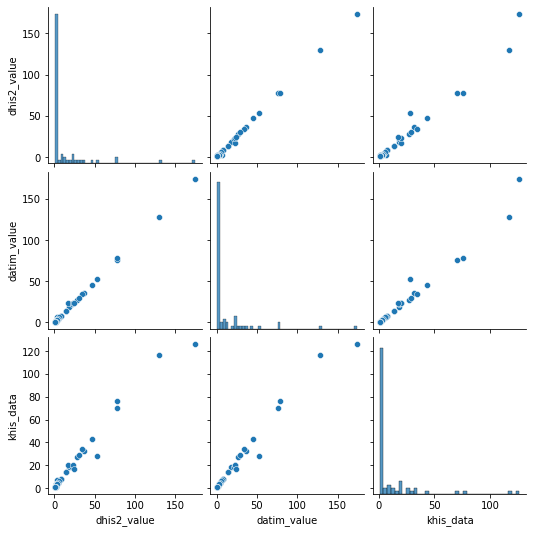

In [41]:
sns.pairplot(HTS_PMTCT.select_dtypes(exclude=['object']));

In [42]:
# Correlation Matrix
HTS_PMTCT.select_dtypes(include=['int64','float64']).corr()

,dhis2_value,datim_value,khis_data
dhis2_value,1.000000,0.999410,0.987848
datim_value,0.999410,1.000000,0.987178
khis_data,0.987848,0.987178,1.000000


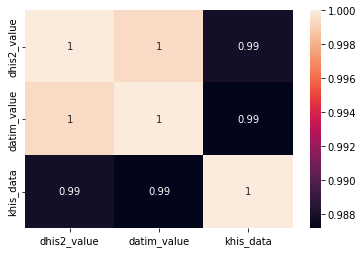

In [43]:
sns.heatmap(HTS_PMTCT.select_dtypes(include=['int64','float64']).corr(),annot=True);

### Insight -
* Most features have a high and direct correlation

# Visualizations

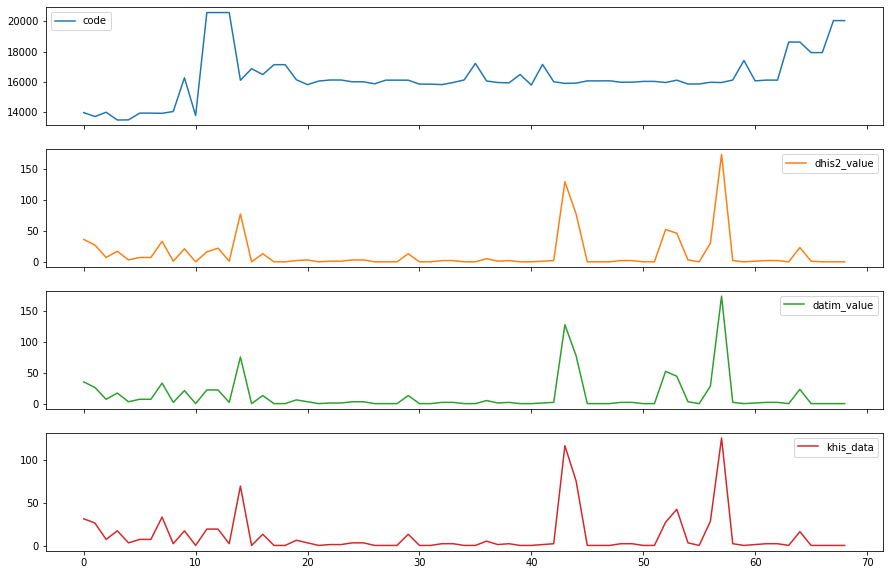

In [44]:
# Plot the data
HTS_PMTCT.plot(figsize=(15,10),subplots=True);

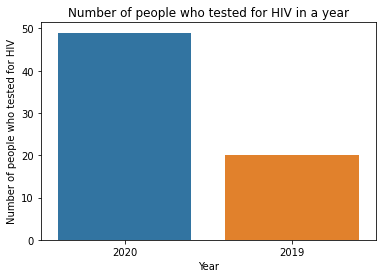

In [45]:
# Yearly HIV Testing
sns.countplot(x='Year',data=HTS_PMTCT)
plt.title('Number of people who tested for HIV in a year')
plt.xlabel('Year')
plt.ylabel('Number of people who tested for HIV')
plt.show();

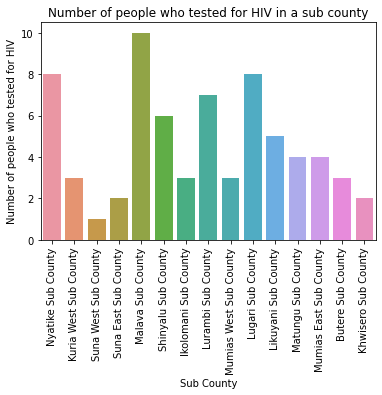

In [46]:
# Sub county wise HIV Testing
sns.countplot(x='sub_county',data=HTS_PMTCT)
plt.title('Number of people who tested for HIV in a sub county')
plt.xlabel('Sub County')
plt.ylabel('Number of people who tested for HIV')
plt.xticks(rotation=90)
plt.show();

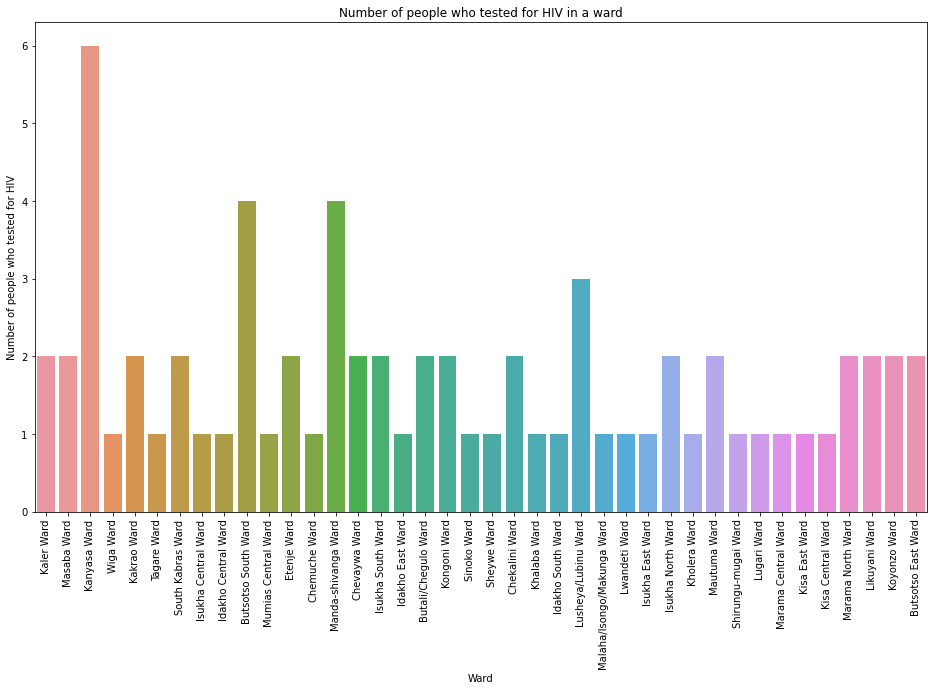

In [47]:
# Ward wise HIV Testing
plt.figure(figsize=(16,9))
sns.countplot(x='ward',data=HTS_PMTCT)
plt.title('Number of people who tested for HIV in a ward')
plt.xlabel('Ward')
plt.ylabel('Number of people who tested for HIV')
plt.xticks(rotation=90)
plt.show();

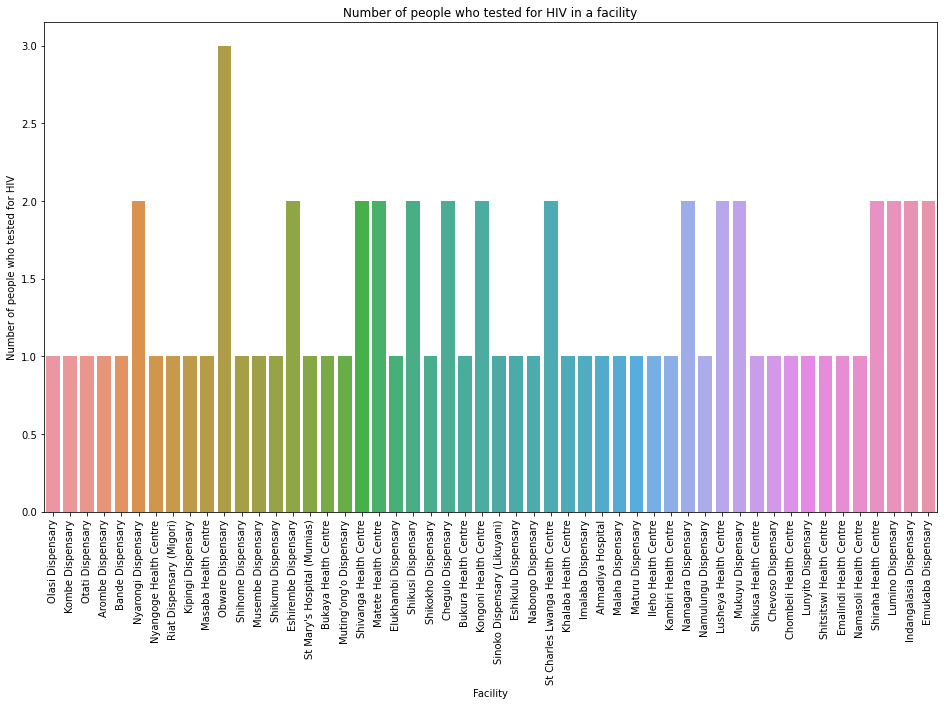

In [48]:
# Facility wise HIV Testing
plt.figure(figsize=(16,9))
sns.countplot(x='facility',data=HTS_PMTCT)
plt.title('Number of people who tested for HIV in a facility')
plt.xlabel('Facility')
plt.ylabel('Number of people who tested for HIV')
plt.xticks(rotation=90)
plt.show();

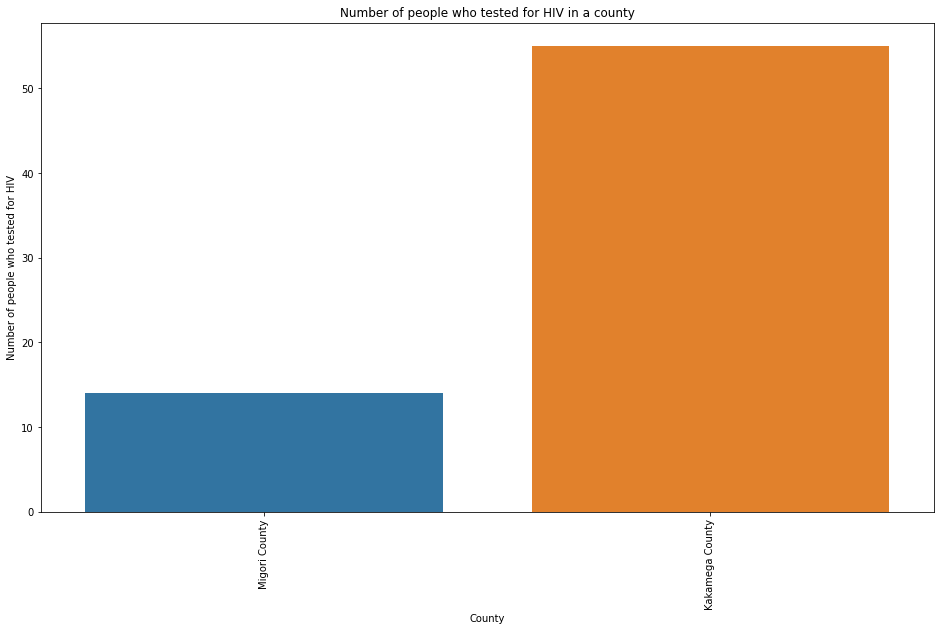

In [49]:
# County wise HIV Testing
plt.figure(figsize=(16,9))
sns.countplot(x='county',data=HTS_PMTCT)
plt.title('Number of people who tested for HIV in a county')
plt.xlabel('County')
plt.ylabel('Number of people who tested for HIV')
plt.xticks(rotation=90)
plt.show();

# Modelling

In [20]:
df1 = HTS_comparison21[["facility", "ward", "sub_county", "county", "indicators", "khis_data", "datim_value"]]

In [51]:
#PMTCT_comparison21.loc[:, 'facility'] = 'Yes'
#df1["PMTCT"] = PMTCT_comparison21.facility

In [52]:
#HTS_comparison21.loc[: 'facility'] = 'No'
#df1["HTS"] = HTS_comparison21.facility

In [21]:
df1[["period", "Month", "Quarter"]] = HTS_PMTCT[["period", "Month", "Quarter"]]
df1.head()

,facility,ward,sub_county,county,indicators,khis_data,datim_value,period,Month,Quarter
0,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,MOH 731 Start ART_25+(M) HV03-024,7,7.0,2020Q1,01,1
1,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,MOH 731 Tested_15-19(F) HV01-05,12,43.0,2020Q1,01,1
2,Westlands Health Centre,Parklands/Highridge Ward,Westlands Sub County,Nairobi County,MOH 731 Start ART_25+(M) HV03-024,7,6.0,2020Q2,04,2
3,Westlands Health Centre,Parklands/Highridge Ward,Westlands Sub County,Nairobi County,MOH 731 Tested_15-19(F) HV01-05,16,48.0,2020Q1,01,1
4,Murang'a District Hospital,Township Ward,Kiharu Sub County,Muranga County,MOH 731 Tested_10-14(F) HV01-03,19,45.0,2020Q1,01,1


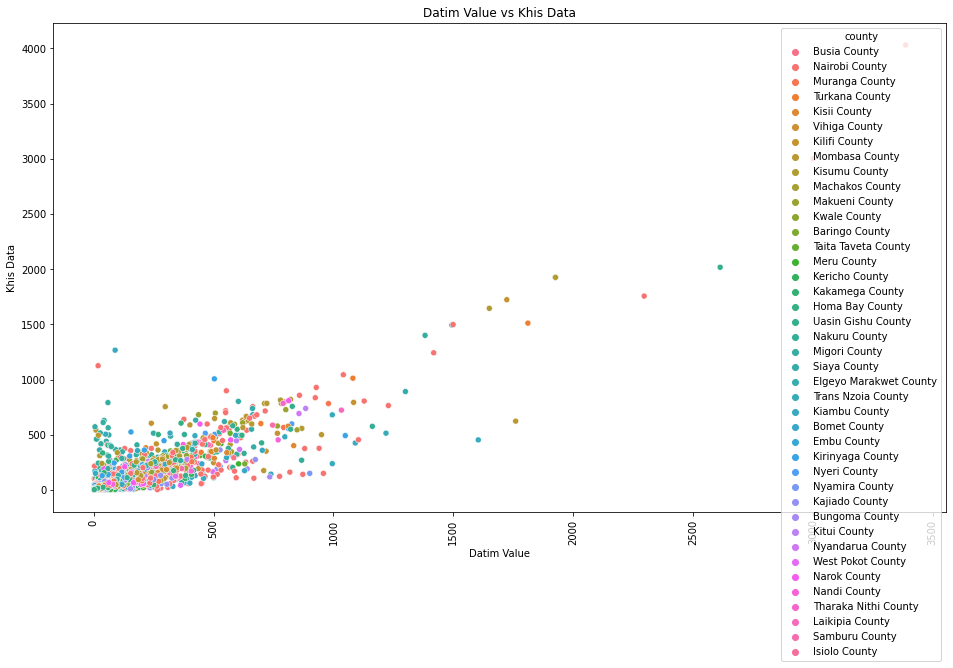

In [54]:
# Plot the datim value and khis data versus county
plt.figure(figsize=(16,9))
sns.scatterplot(x='datim_value', y='khis_data', data=df1, hue='county')
plt.title('Datim Value vs Khis Data')
plt.xlabel('Datim Value')
plt.ylabel('Khis Data')
plt.xticks(rotation=90)
plt.show();

In [22]:
facity = PMTCT_comparison21.facility.to_list()

In [23]:
facity = pd.Series(facity)
df1['facility'] = pd.concat([df1['facility'], facity], ignore_index=True)



In [24]:
lq = []
for l in HTS_comparison21.facility:
  lq.append(l)

In [25]:
lw = []
for w in PMTCT_comparison21.facility:
  lw.append(w)

In [26]:
PMTCT = []
for col in df1.facility:
  if col in lw:
    PMTCT.append("Yes")
  elif col in lq:
    PMTCT.append("No")

In [27]:
pmtct_series = pd.Series(PMTCT)
df1['PMTCT'] = pmtct_series
df1.head()

,facility,ward,sub_county,county,indicators,khis_data,datim_value,period,Month,Quarter,PMTCT
0,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,MOH 731 Start ART_25+(M) HV03-024,7,7.0,2020Q1,01,1,Yes
1,Malaba Dispensary,Malaba Central Ward,Teso North Sub County,Busia County,MOH 731 Tested_15-19(F) HV01-05,12,43.0,2020Q1,01,1,Yes
2,Westlands Health Centre,Parklands/Highridge Ward,Westlands Sub County,Nairobi County,MOH 731 Start ART_25+(M) HV03-024,7,6.0,2020Q2,04,2,Yes
3,Westlands Health Centre,Parklands/Highridge Ward,Westlands Sub County,Nairobi County,MOH 731 Tested_15-19(F) HV01-05,16,48.0,2020Q1,01,1,Yes
4,Murang'a District Hospital,Township Ward,Kiharu Sub County,Muranga County,MOH 731 Tested_10-14(F) HV01-03,19,45.0,2020Q1,01,1,Yes


In [61]:
df1.PMTCT.value_counts()

Yes    33939
No      1586
Name: PMTCT, dtype: int64

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35525 entries, 0 to 35524
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   facility     35525 non-null  object 
 1   ward         35525 non-null  object 
 2   sub_county   35525 non-null  object 
 3   county       35525 non-null  object 
 4   indicators   35525 non-null  object 
 5   khis_data    35525 non-null  int64  
 6   datim_value  34569 non-null  float64
 7   period       69 non-null     object 
 8   Month        69 non-null     object 
 9   Quarter      69 non-null     object 
 10  PMTCT        35525 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.0+ MB


In [63]:
df1.columns

Index(['facility', 'ward', 'sub_county', 'county', 'indicators', 'khis_data',
       'datim_value', 'period', 'Month', 'Quarter', 'PMTCT'],
      dtype='object')

In [29]:
#!pip install category_encoders
#import category_encoders
#from category_encoders import OneHotEncoder

target = "PMTCT"
features = ['facility', 'ward', 'sub_county', 'county', 'indicators', 
            'khis_data', 'datim_value', 'period', 'Month']

X = df1[features]
y = df1[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

lr_model = make_pipeline(
    OneHotEncoder(handle_unknown = "ignore"),
    LogisticRegression()
)
lr_model.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression())])

In [65]:
y_pred = lr_model.predict(X_test)
y_pred

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [66]:
from sklearn.metrics import log_loss, accuracy_score, classification_report, roc_auc_score, \
confusion_matrix, ConfusionMatrixDisplay
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.9915552427867699


              precision    recall  f1-score   support

          No       1.00      0.80      0.89       302
         Yes       0.99      1.00      1.00      6803

    accuracy                           0.99      7105
   macro avg       0.99      0.90      0.94      7105
weighted avg       0.99      0.99      0.99      7105



In [39]:
# Build a Random Forest Classifier

# Encode the data
encoder = OneHotEncoder(handle_unknown = "ignore")
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Fit the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test_encoded)
print(rf_y_pred)

# Evaluate the model
from sklearn.metrics import log_loss, accuracy_score, classification_report, roc_auc_score, \
confusion_matrix, ConfusionMatrixDisplay
print(f'Accuracy score: {accuracy_score(y_test, rf_y_pred)}')
print('\n')
print(f'{classification_report(y_test, rf_y_pred)}')

['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
Accuracy score: 0.9971850809289233


              precision    recall  f1-score   support

          No       1.00      0.93      0.97       302
         Yes       1.00      1.00      1.00      6803

    accuracy                           1.00      7105
   macro avg       1.00      0.97      0.98      7105
weighted avg       1.00      1.00      1.00      7105



* Precision is a metric that tells us about the quality of positive predictions. Out of every site to have taken PMTCT, how many of them actually did?

* Recall tells us about how well the model identifies true positives. Out of all the sites that actually took PMTCT, how many of them did the model identify?
* The recall score is the most important metric for this problem. We want to be able to predict as many people who are HIV positive as possible. We don't want to miss out on any of them. This is why we are using the recall score as our main metric for evaluation.
* For our case, the recall is 0.93 which is very good. This means that our model is able to predict 93% of the people who are HIV positive correctly.

In [41]:
# Plot the confusion matrix
plt.subplots(plt.figure(figsize=(10,10)))
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, rf_y_pred)
ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_).plot();

ValueError: Number of rows must be a positive integer, not <Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

* The true negative is 282 and the false negative is 20. This means that our model predicted 282 sites are PMTCTand 20 sites are negative wrongly. This is not a big deal because we are more concerned about the people who are HIV positive and our model was able to predict them correctly.
* The true positive is 6803 and the false negative is 0. This means that our model predicted 6803 sites are PMTC positive correctly and 0 sites are PMTCT as negative(HTS). 

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train_encoded, y_train)

xgb_y_pred = xgb_model.predict(X_test_encoded)
xgb_y_pred

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['No' 'Yes']

In [77]:
# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_test, xgb_y_pred))

Error rate of XGB classifier:  0.04236453201970447


In [78]:
accuracy = accuracy_score(y_test, xgb_y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.76%


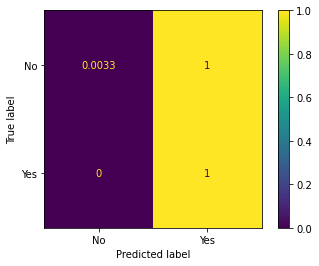

In [80]:
from sklearn.metrics import plot_confusion_matrix
# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xgb_model,X_test_encoded, y_test,normalize='true');

* For the XGB, the TP is 1 and the FN is 0. This means that our model predicted 1 site is PMTC positive correctly and 0 sites are PMTCT as negative(HTS). The recall score is 1.0 which is very good. This means that our model is able to predict 100% of the people who are HIV positive correctly.

In [37]:
classification_report(y_test, xgb_y_pred)
classification_report

NameError: name 'xgb_y_pred' is not defined

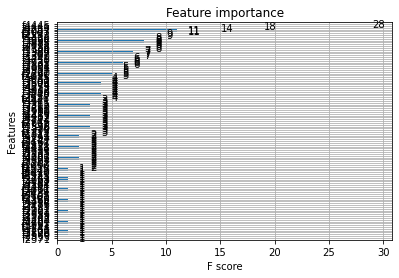

<Figure size 1296x3600 with 0 Axes>

In [83]:
xgb.plot_importance(xgb_model)
plt.figure(figsize = (18, 50))
plt.show();

In [89]:
# Save model
import joblib

joblib.dump(xgb_model, "hiv.pkl")

['hiv.pkl']

In [90]:
model = joblib.load("hiv.pkl")
#convert model into python code 
import m2cgen as m2c 
model_to_python = m2c.export_to_python(model)

# show python code 
#open text file
text_file = open("model.txt", "w")

#write string to file
text_file.write(model_to_python)

#close file
text_file.close()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 KB 3.8 MB/s eta 0:00:00


In [31]:
import pickle
pickle.dump(rf_model, open('model.pkl','wb'))

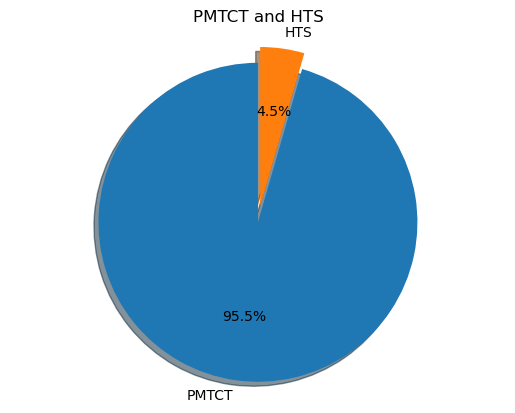

In [36]:
# Pie chart showing the distribution of PMTCT and HTS
labels = ['PMTCT', 'HTS']
sizes = [df1.PMTCT.value_counts()[0], df1.PMTCT.value_counts()[1]]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('PMTCT and HTS')
plt.show();

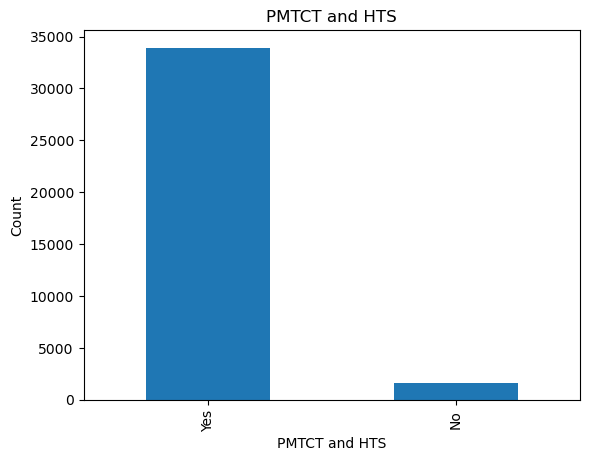

In [42]:
# Comparison of PMTCT and HTS in bar chart
df1.PMTCT.value_counts().plot(kind='bar')
plt.title('PMTCT and HTS')
plt.xlabel('PMTCT and HTS')
plt.ylabel('Count')
plt.show();

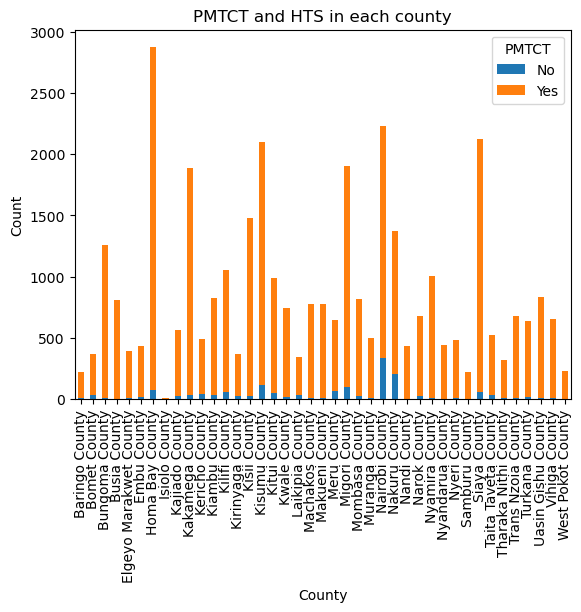

In [43]:
# Now build on top of the PMTCT and HTS comparison to have a comparison of PMTCT and HTS in each county
df1.groupby(['county', 'PMTCT']).size().unstack().plot(kind='bar', stacked=True)
plt.title('PMTCT and HTS in each county')
plt.xlabel('County')
plt.ylabel('Count')
plt.show();

<Figure size 1000x1000 with 0 Axes>

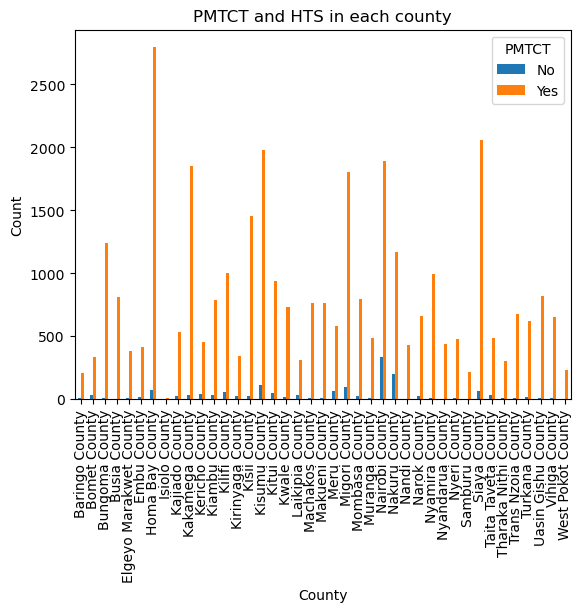

In [45]:
# In stead of having a stacked bar chart, we can have a side by side bar chart
plt.figure(figsize=(10,10))
df1.groupby(['county', 'PMTCT']).size().unstack().plot(kind='bar')
plt.title('PMTCT and HTS in each county')
plt.xlabel('County')
plt.ylabel('Count')
plt.show();

# Now build on top of the PMTCT and HTS comparison to have a comparison of PMTCT and HTS in each sub-county

In [1]:
X.columns

NameError: name 'X' is not defined